```f(x) = x**2 - 6*abs(x) + 8```

* Определить корни

* Найти интервалы, на которых функция возрастает

* Найти интервалы, на которых функция убывает

* Построить график

* Вычислить вершину

* Определить промежутки, на котором f(x) > 0

* Определить промежутки, на котором f(x) < 0

In [1]:
from sympy import *

In [2]:
x = Symbol('x', real=True)

In [3]:
#y = x ** 2 - 6 * abs(x) + 8
y = (sin(x)/2 + cos(x)/2)**2 * sin(x)
y

(sin(x)/2 + cos(x)/2)**2*sin(x)

Область определения функции

In [4]:
Reals - singularities(y, x)

Reals

**Определить корни**

In [5]:
roots_y = solve(y)
roots_y

[0, -pi/4, 3*pi/4, pi]

**Построить график**

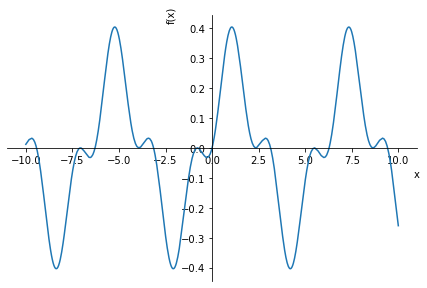

In [6]:
g_y = plot(y)

Находим производную функции для нахождения экстремумов

In [7]:
d = diff(y)
d

(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)

Находим корни производной - точки экстремума

In [8]:
roots_d = solve(d)
roots_d

[-pi/4,
 3*pi/4,
 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2),
 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2),
 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2),
 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)]

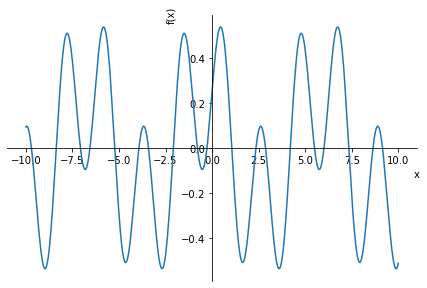

In [9]:
g_d = plot(d)

Исходя из графика и учитывая ```|x|``` в функции, производная равна нулю в двух точках ```3``` и ```-3```, так же в точке ```x=0``` функция имеет излом, который не является экстремумом, но необходим для исследования функции.
Добавляем недостающие точки в корни производной

In [10]:
roots_d.append(roots_d[0] * -1)
roots_d.append(0)
roots_d = sorted(roots_d)
roots_d

[-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2),
 -pi/4,
 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2),
 0,
 pi/4,
 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2),
 3*pi/4,
 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)]

In [11]:
# Функция принимает корни уравнения
# и создаёт промежутки для исследования функции
def make_intervals(roots):
    intervals = []
    intervals.append([roots[0]-1, roots[0]])
    for i in range(len(roots)-1):
        r = [roots[i], roots[i+1]]
        intervals.append(r)
    intervals.append([roots[-1], roots[-1]+1])
    return intervals

**Вычислить вершины**

In [12]:
print(f'Точки экстремума функции {roots_d[0]}, {roots_d[-1]}')

Точки экстремума функции -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2), 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)


In [18]:
for i in roots_d:
    left_val = i-0.01 if i == 0 else i-0.01*abs(i)
    right_val = i+0.01 if i == 0 else i+0.01*abs(i)
    if d.evalf(subs={x: left_val}) < d.evalf(subs={x: i}) and d.evalf(subs={x: right_val}) > d.evalf(subs={x: i}):
        print(f'Точка минимума - "{i}"')
    else:
        print(f'Точка максимума - "{i}"')

точка минимума - "-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)"
точка максимума - "-pi/4"
точка минимума - "2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)"
точка минимума - "0"
точка максимума - "pi/4"
точка максимума - "2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)"
точка минимума - "3*pi/4"
точка максимума - "2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)"


**Интервалы на которых функция возрастает/убывает**

In [14]:
intervals = make_intervals(roots_d)

In [15]:
for i in intervals:
    start_int = -oo if intervals.index(i) == 0 else i[0]
    end_int = oo if intervals.index(i) == len(intervals)-1 else i[1]
    if d.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'⮝ Функция возрастает на промежутке {start_int, end_int}')
    else:
        print(f'⮟ Функция убывает на промежутке {start_int, end_int}')

⮟ Функция убывает на промежутке (-oo, -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2))
⮝ Функция возрастает на промежутке (-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2), -pi/4)
⮟ Функция убывает на промежутке (-pi/4, 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2))
⮝ Функция возрастает на промежутке (2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2), 0)
⮝ Функция возрастает на промежутке (0, pi/4)
⮝ Функция возрастает на промежутке (pi/4, 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2))
⮟ Функция убывает на промежутке (2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2), 3*pi/4)
⮝ Функция возрастает на промежутке (3*pi/4, 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2))
⮟ Функция убывает на промежутке (2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2), oo)


**Определить промежутки, на которых ```f(x) > 0``` и ```f(x) < 0```**

In [16]:
intervals = make_intervals(roots_y)

In [17]:
for i in intervals:
    start_int = -oo if intervals.index(i) == 0 else i[0]
    end_int = oo if intervals.index(i) == len(intervals)-1 else i[1]
    if y.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'f(x) > 0 на промежутке {start_int, end_int}')
    else:
        print(f'f(x) < 0 на промежутке {start_int, end_int}')

f(x) < 0 на промежутке (-oo, 0)
f(x) < 0 на промежутке (0, -pi/4)
f(x) > 0 на промежутке (-pi/4, 3*pi/4)
f(x) > 0 на промежутке (3*pi/4, pi)
f(x) < 0 на промежутке (pi, oo)
